In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import mplcursors
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from bokeh.palettes import PuBu3
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
 df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [10]:
df.describe(include='object').T

,count,unique,top,freq
gender,1000,2,female,518
race/ethnicity,1000,5,group C,319
parental level of education,1000,6,some college,226
lunch,1000,2,standard,645
test preparation course,1000,2,none,642


In [11]:
categorical_columns = df.select_dtypes(include='object').columns
unique_categories = {col: df[col].unique().tolist() for col in categorical_columns}
print(unique_categories)

{'gender': ['female', 'male'], 'race/ethnicity': ['group B', 'group C', 'group A', 'group D', 'group E'], 'parental level of education': ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school'], 'lunch': ['standard', 'free/reduced'], 'test preparation course': ['none', 'completed']}


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns

print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))
print('We have {} numeric features: {}'.format(len(numeric_features), numeric_features))

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
We have 3 numeric features: ['math score', 'reading score', 'writing score']


In [13]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df.total_score / 3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [14]:
def count_full_marks(df):
    subjects = ['reading score', 'writing score', 'math score']
    subject_columns = ['reading score', 'writing score', 'math score']
    full_marks = {subject: df[df[column] == 100][column].count() for 
                  subject, column in zip(subjects, subject_columns)}
    result = "\n".join([f'Number of students with full marks in {subject.capitalize()}: {count}'
                        for subject, count in full_marks.items()])
    return result
print(count_full_marks(df))

Number of students with full marks in Reading score: 17
Number of students with full marks in Writing score: 14
Number of students with full marks in Math score: 7


In [15]:
def average_less_marks(df):
    subjects = ['reading score', 'writing score', 'math score']
    subjects_columns = ['reading score', 'writing score', 'math score']
    average_mark = {subject: df[df[column] <= 20][column].count() for 
                    subject, column in zip(subjects, subjects_columns)}
    result = "\n".join([f'number of students with less than 20 marks in {subject.capitalize()}: {count}'
                        for subject, count in average_mark.items()])
    return result
print(average_less_marks(df))

number of students with less than 20 marks in Reading score: 1
number of students with less than 20 marks in Writing score: 3
number of students with less than 20 marks in Math score: 4


#### graphs

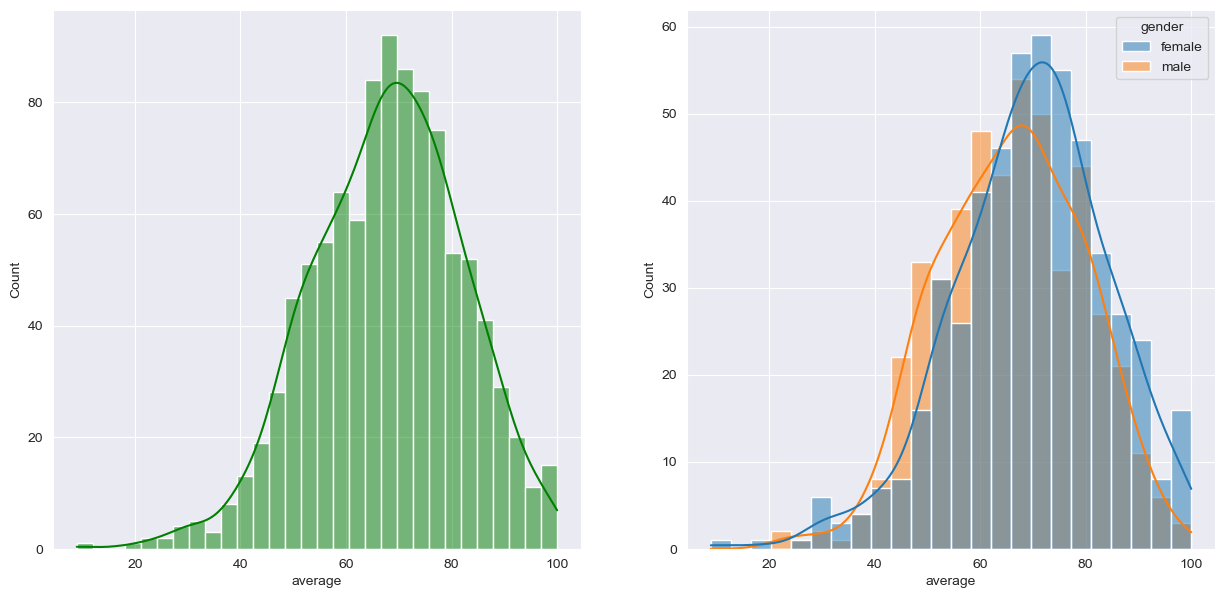

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data = df, x='average', bins = 30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data =df, x = 'average', kde = True, hue = 'gender')
plt.show()

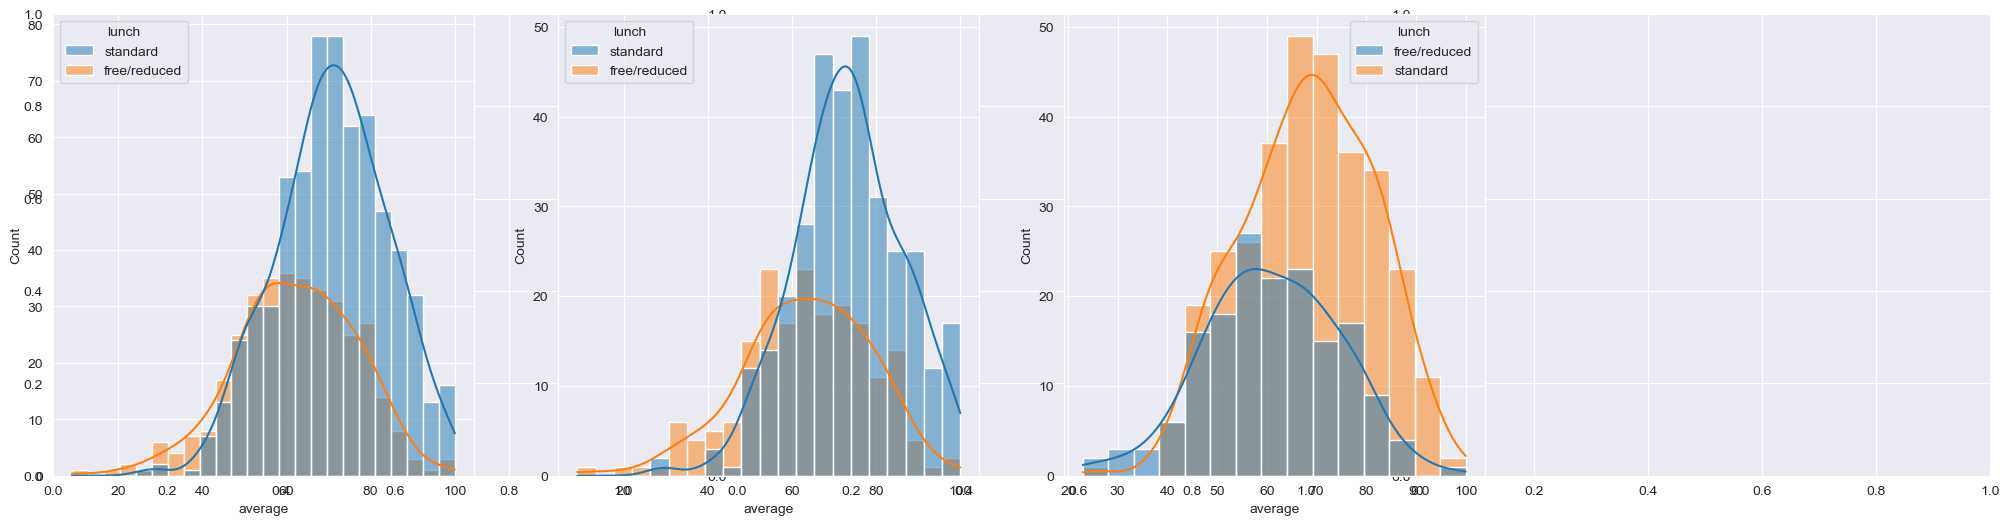

In [17]:
plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde = True, hue = 'lunch')
plt.show()

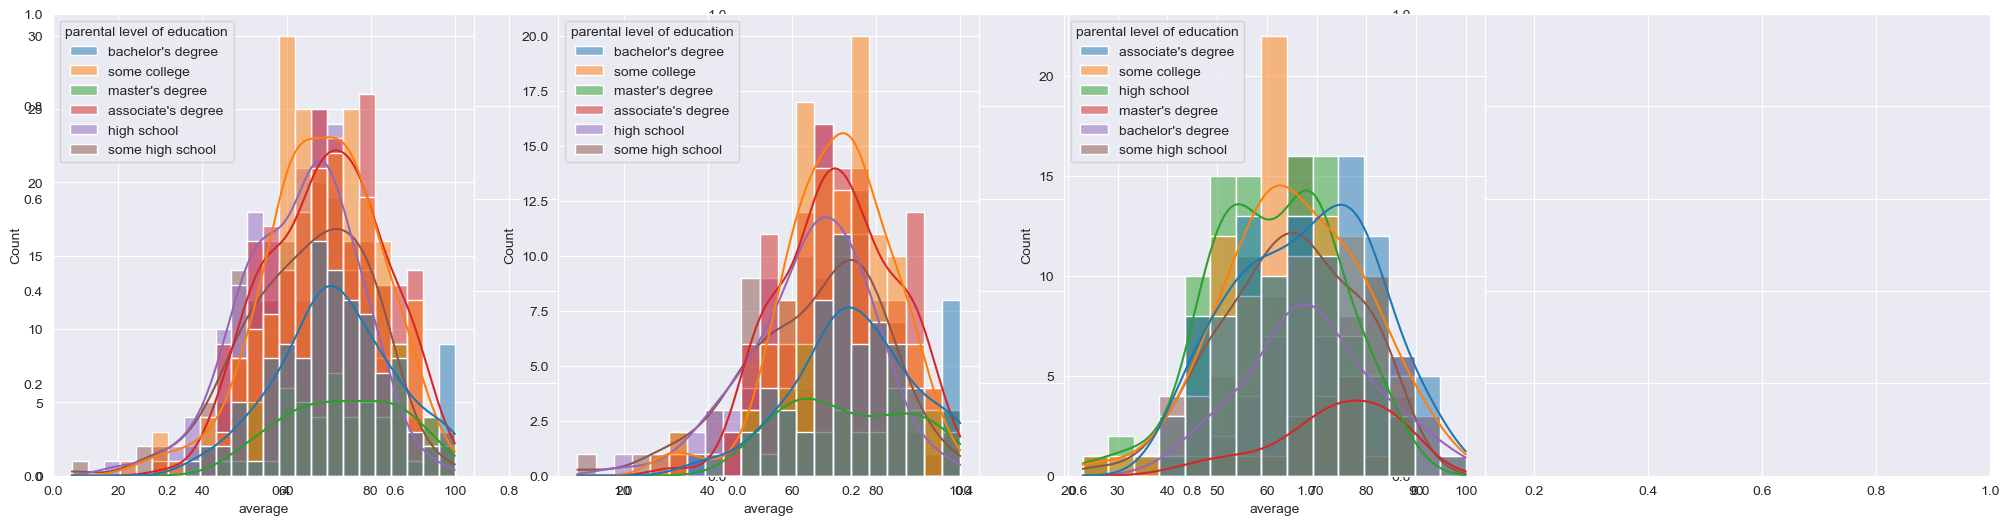

In [18]:
plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(143)
sns.histplot(data= df[df.gender == 'male'], x = 'average', kde = True, hue = 'parental level of education')
plt.show()

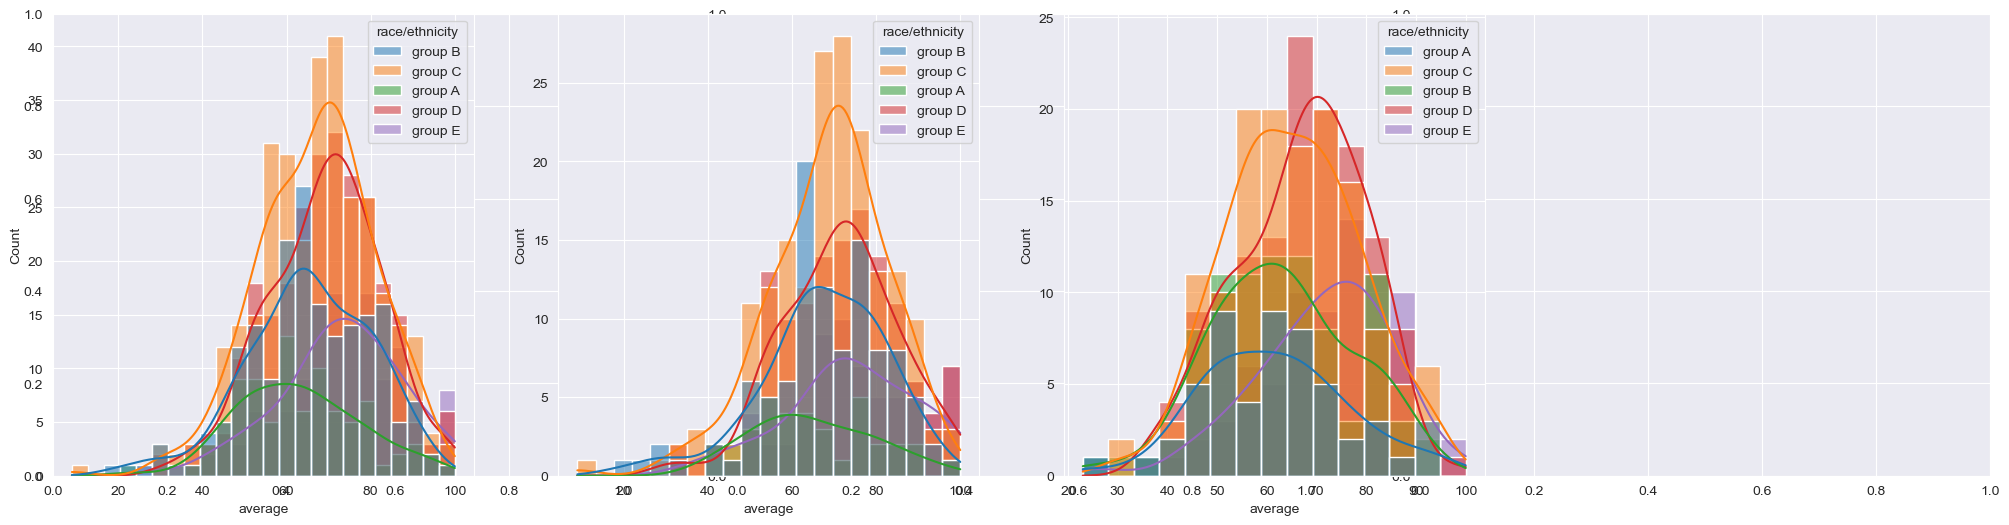

In [19]:
plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
ax = sns.histplot(data = df, x = 'average', kde = True, hue = 'race/ethnicity')
plt.subplot(142)
ax = sns.histplot(data = df[df.gender=='female'], x = 'average', kde = True, hue = 'race/ethnicity')
plt.subplot(143)
ax = sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'race/ethnicity')
plt.show()

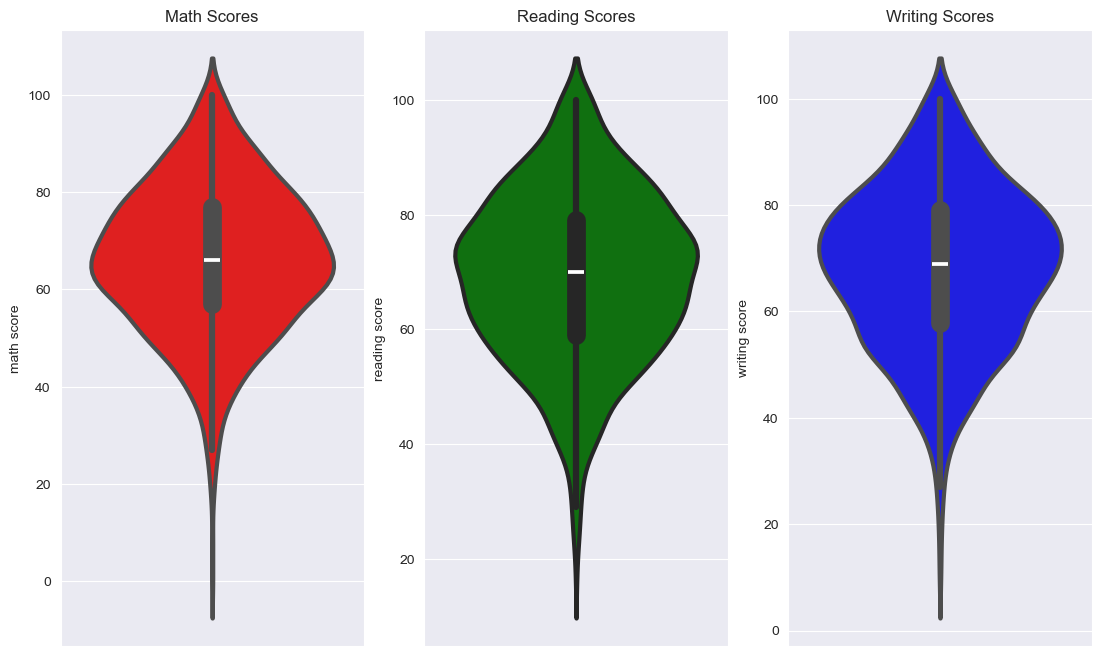

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(y = 'math score', data = df, color = 'red', linewidth = 3)
plt.subplot(1,4,2)
plt.title('Reading Scores')
sns.violinplot(y = 'reading score', data = df, color = 'green', linewidth = 3)
plt.subplot(1,4,3)
plt.title('Writing Scores')
sns.violinplot(y = 'writing score', data = df, color = 'blue', linewidth = 3)
plt.show()

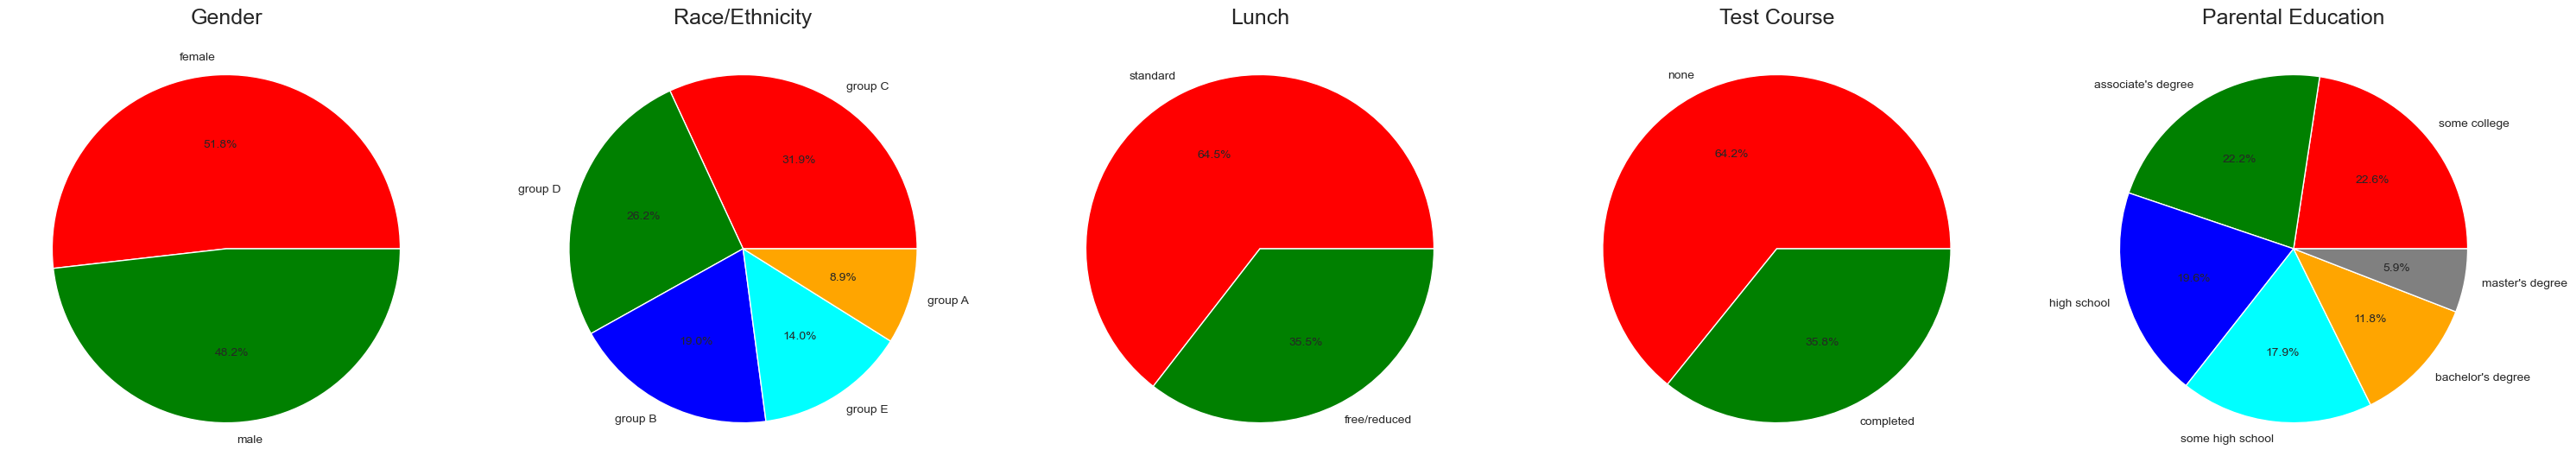

In [21]:
import matplotlib.pyplot as plt

def plot_pie_charts(df, columns, titles, colors_list):
    """
    pie chart for categorical features 
    
    Args:
    -  columns: list columns
    - titles: list titles for graphs
    - colors_list: list of list for colors of pie
    """
    num_charts = len(columns)
    plt.rcParams['figure.figsize'] = (6 * num_charts, 8)
    
    # create subplots 
    fig, axes = plt.subplots(1, num_charts, figsize=(6 * num_charts, 8))
    
    for idx, (column, title, colors) in enumerate(zip(columns, titles, colors_list)):
        size = df[column].value_counts()
        labels = size.index
        
        # assignament correct chart
        pie = axes[idx].pie(size, colors=colors, labels=labels, autopct='%1.1f%%')
        axes[idx].set_title(title, fontsize=18)
        axes[idx].axis('off')
        
    
    plt.tight_layout(w_pad=4)  # Ajustar el padding entre subplots
    plt.show()

# function
columns = [
    'gender',
    'race/ethnicity',
    'lunch',
    'test preparation course',
    'parental level of education'
]

titles = [
    'Gender',
    'Race/Ethnicity',
    'Lunch',
    'Test Course',
    'Parental Education'
]

colors_list = [
    ['red', 'green'],                  # gender
    ['red', 'green', 'blue', 'cyan', 'orange'],  # race/ethnicity
    ['red', 'green'],                  # lunch
    ['red', 'green'],                  # test preparation course
    ['red', 'green', 'blue', 'cyan', 'orange', 'grey']  # parental level of education
]

# Llamar a la función para generar los gráficos
plot_pie_charts(df, columns, titles, colors_list)


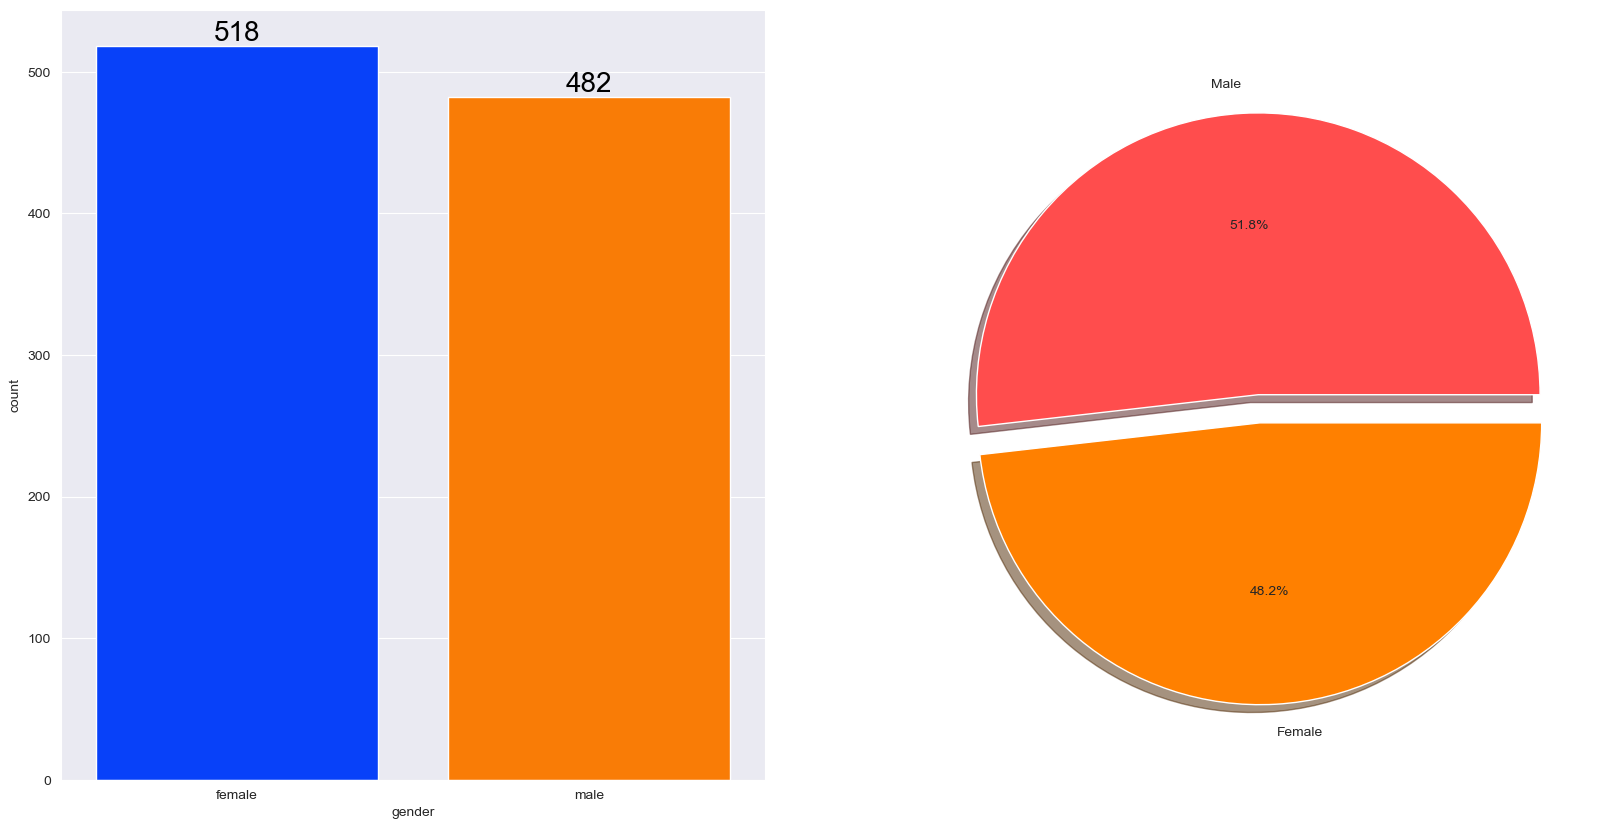

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [23]:
gender_group = df.groupby('gender').mean(numeric_only = True)
gender_group

,math score,reading score,writing score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


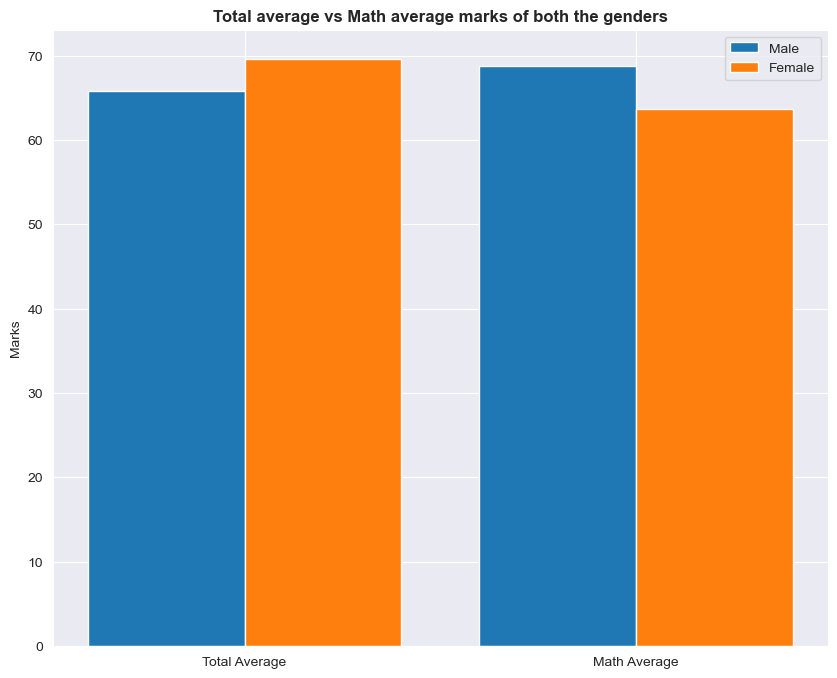

In [24]:
plt.figure(figsize = (10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()


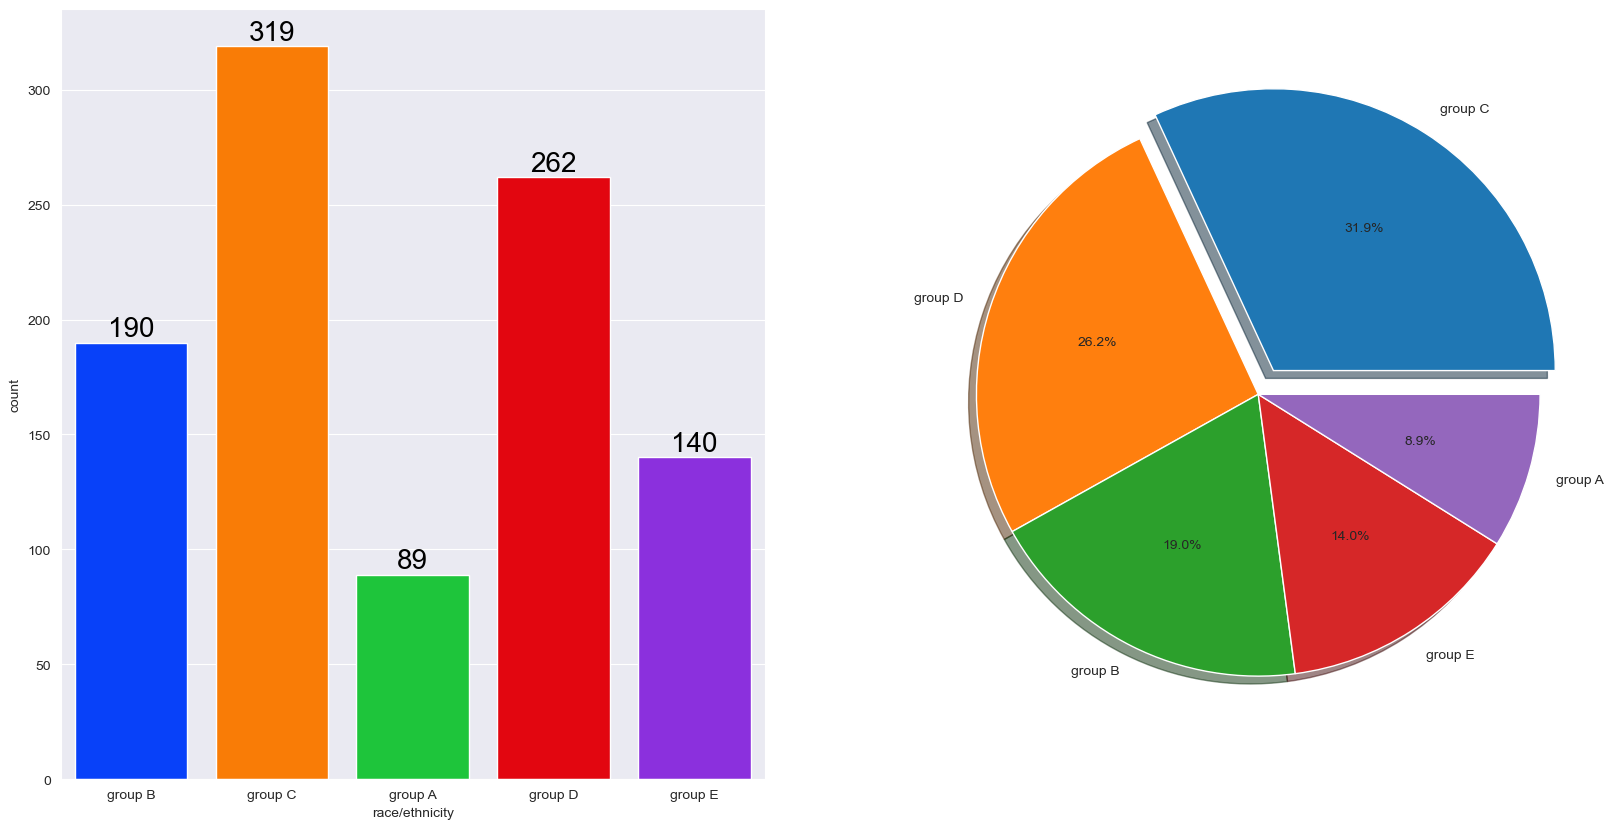

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()       

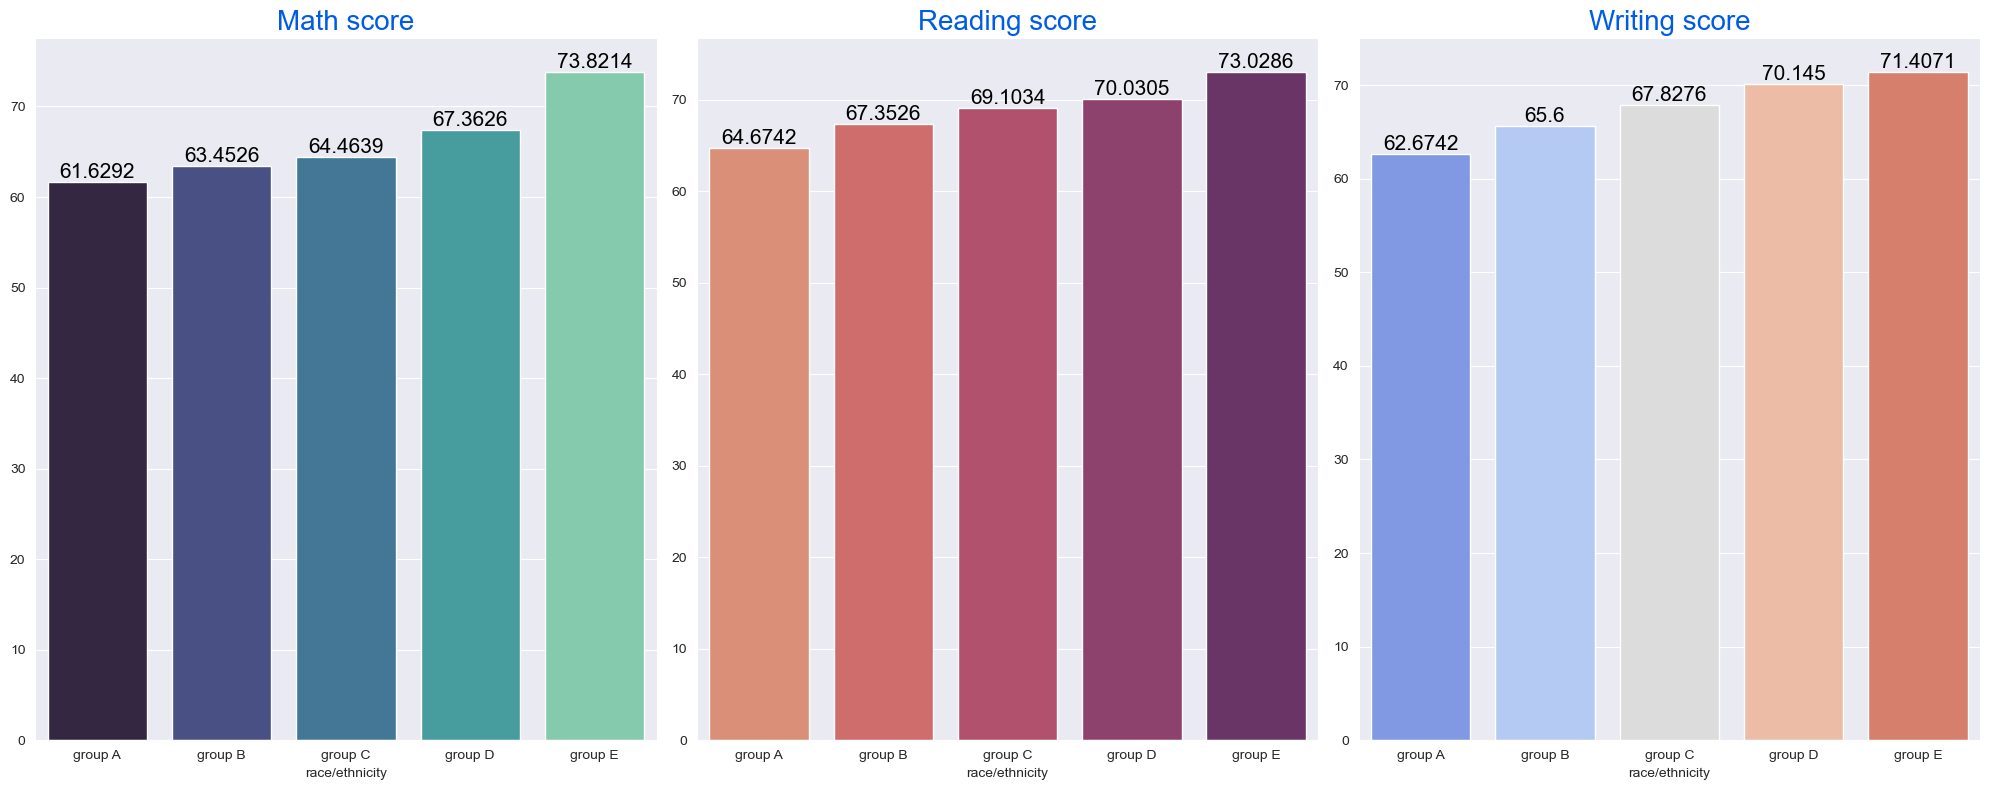

In [26]:
def plot_grouped_scores(df, group_by_column, score_columns, palettes, titles, figsize=(20, 8)):
    """
    Genera gráficos de barras para los promedios de las columnas de puntajes agrupados por una columna específica.
    
    Args:
    - df: DataFrame que contiene los datos.
    - group_by_column: Columna por la cual se agruparán los datos.
    - score_columns: Lista de columnas de puntajes para las cuales se generarán los gráficos.
    - palettes: Lista de paletas de colores para cada gráfico.
    - titles: Lista de títulos para cada gráfico.
    - figsize: Tamaño de la figura (por defecto: (20, 8)).
    """
    group_data = df.groupby(group_by_column)
    fig, axes = plt.subplots(1, len(score_columns), figsize=figsize)
    
    # Si solo hay un gráfico, hacer que axes sea una lista para un tratamiento uniforme
    if len(score_columns) == 1:
        axes = [axes]
    
    for idx, (score_col, palette, title) in enumerate(zip(score_columns, palettes, titles)):
        means = group_data[score_col].mean()
        sns.barplot(
            x=means.index, 
            y=means.values,
            palette=sns.color_palette(palette, len(means)),
            ax=axes[idx]
        )
        axes[idx].set_title(title, color='#005ce6', size=20)
        
        # Añadir etiquetas a las barras
        for container in axes[idx].containers:
            axes[idx].bar_label(container, color='black', size=15)
    
    plt.tight_layout()
    plt.show()

# Uso de la función
plot_grouped_scores(
    df=df,
    group_by_column='race/ethnicity',
    score_columns=['math score', 'reading score', 'writing score'],
    palettes=['mako', 'flare', 'coolwarm'],
    titles=['Math score', 'Reading score', 'Writing score']
)


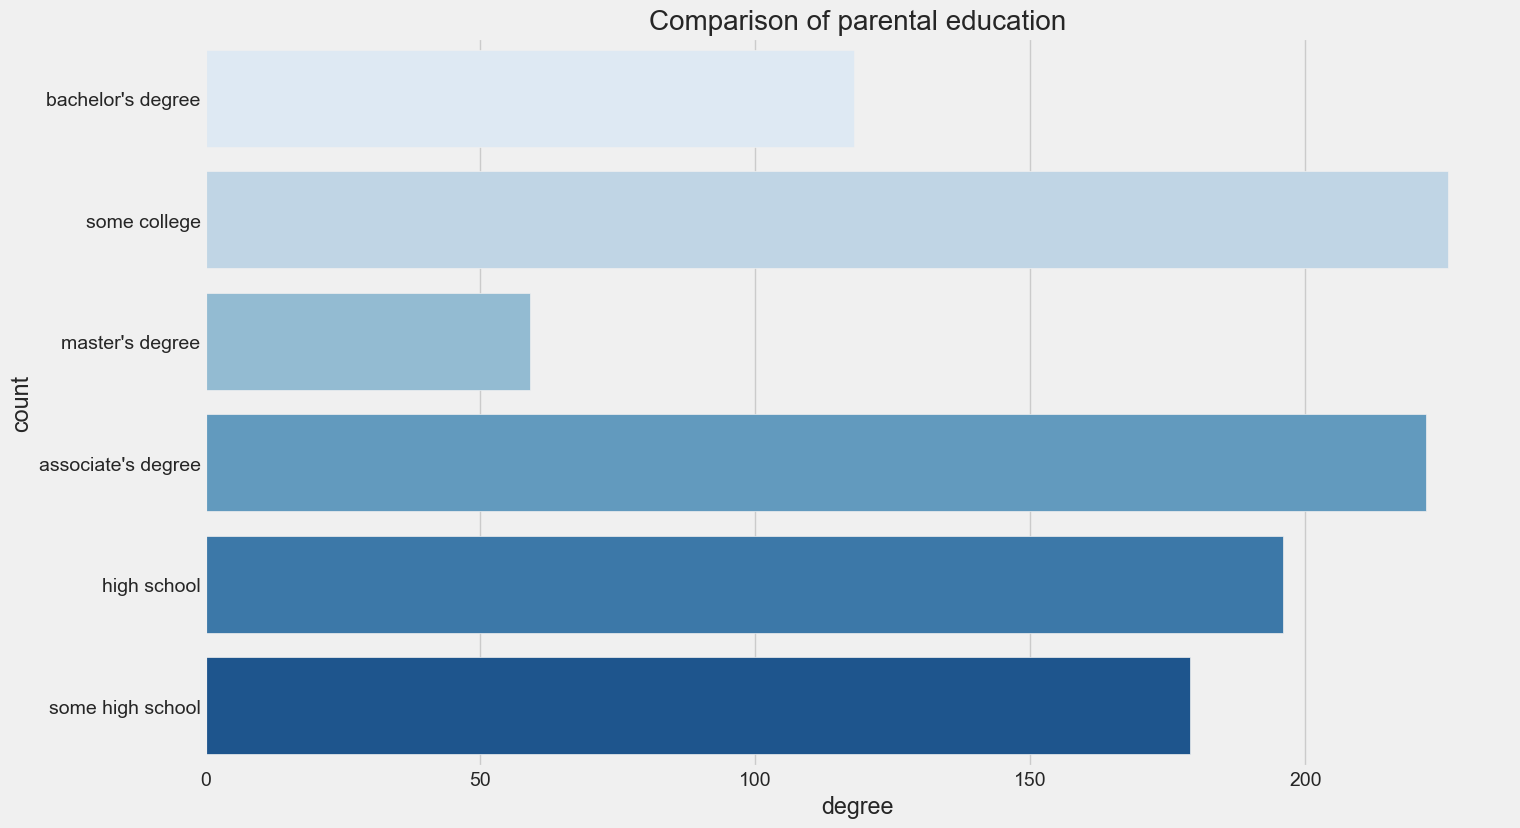

In [27]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of parental education', fontweight = 30, fontsize = 20)
plt.xlabel('degree')
plt.ylabel('count')
plt.show()

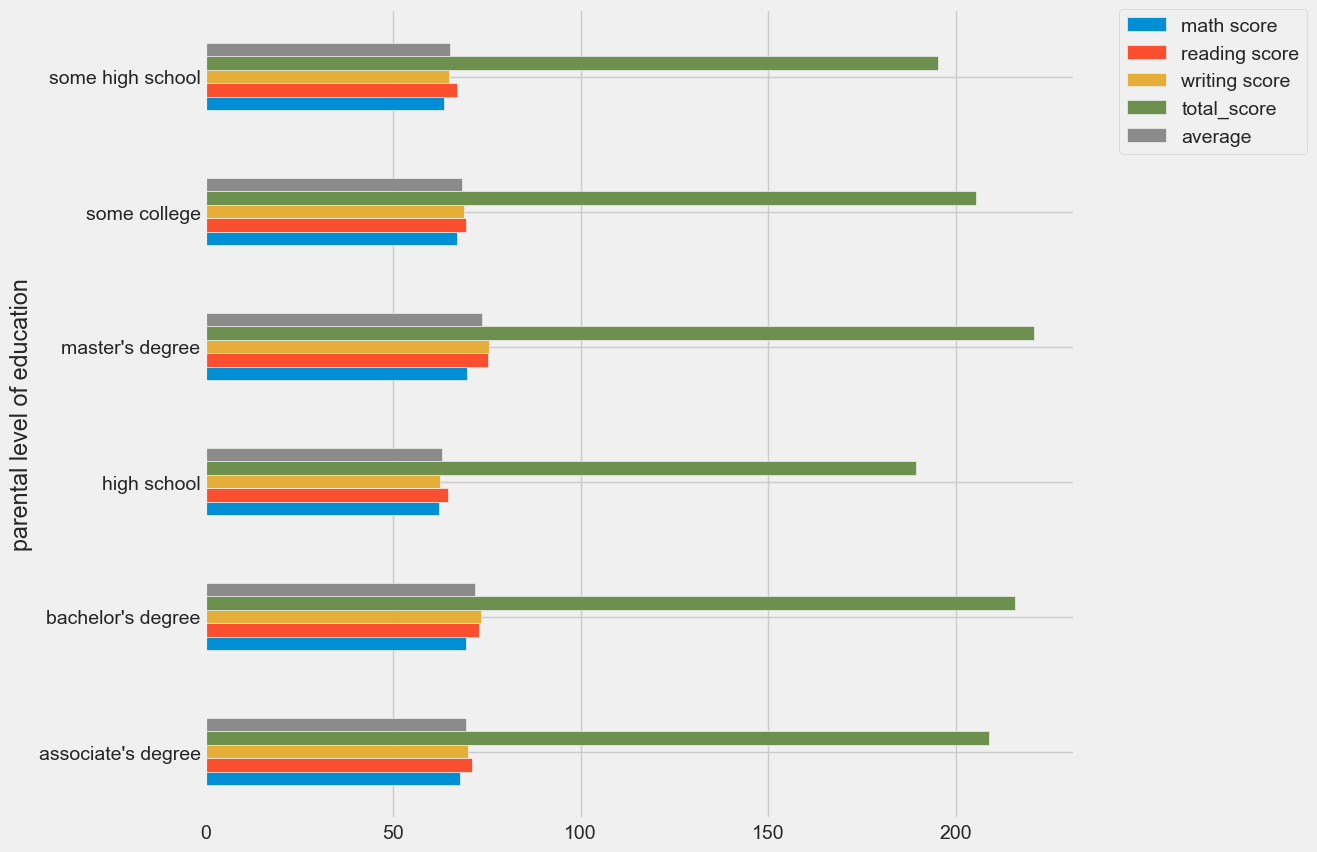

In [28]:
df.groupby('parental level of education').mean(numeric_only = True).plot(kind='barh', figsize = (10,10))
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

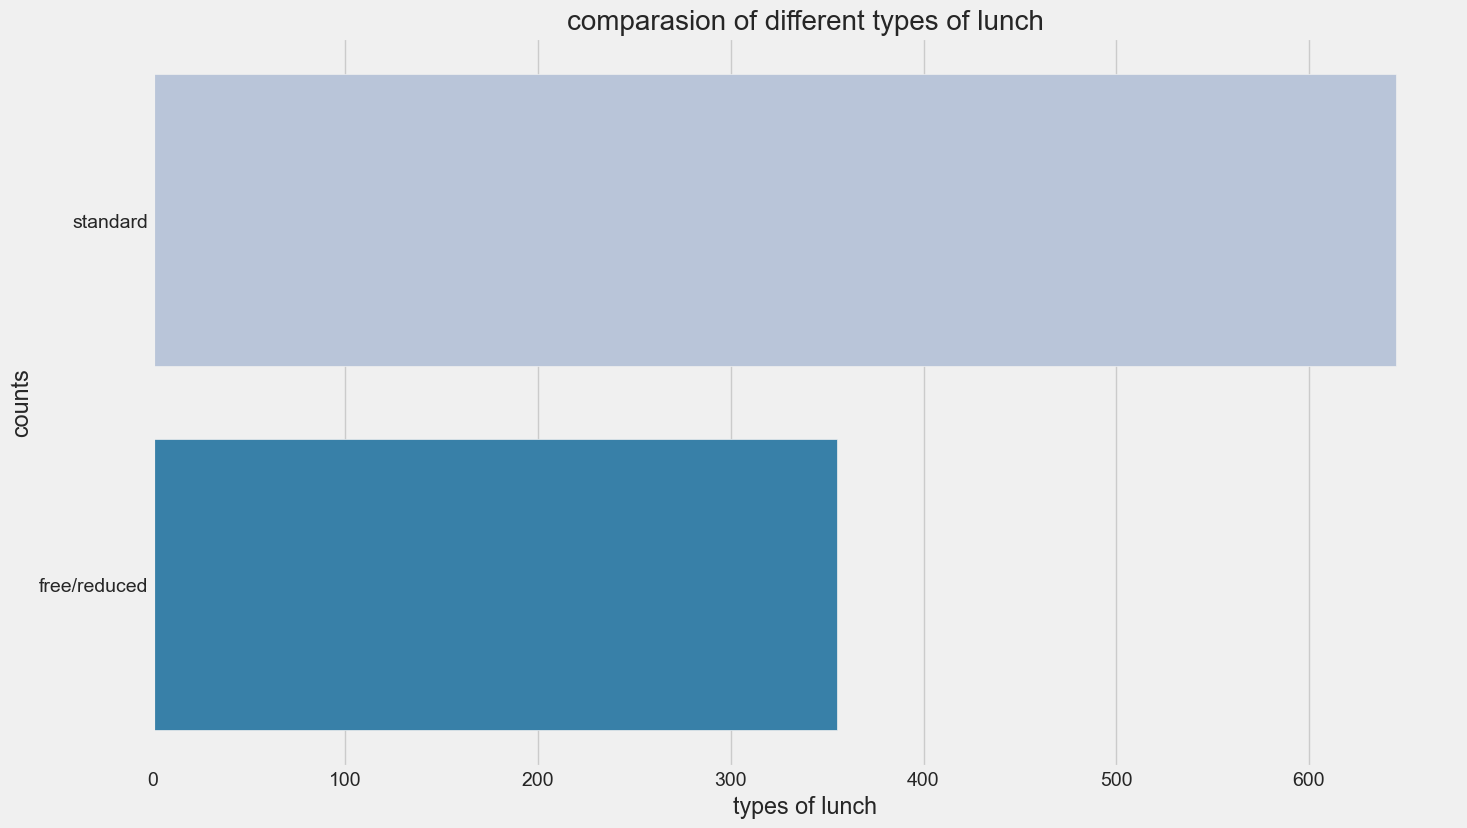

In [29]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('comparasion of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel("types of lunch")
plt.ylabel("counts")
plt.show()

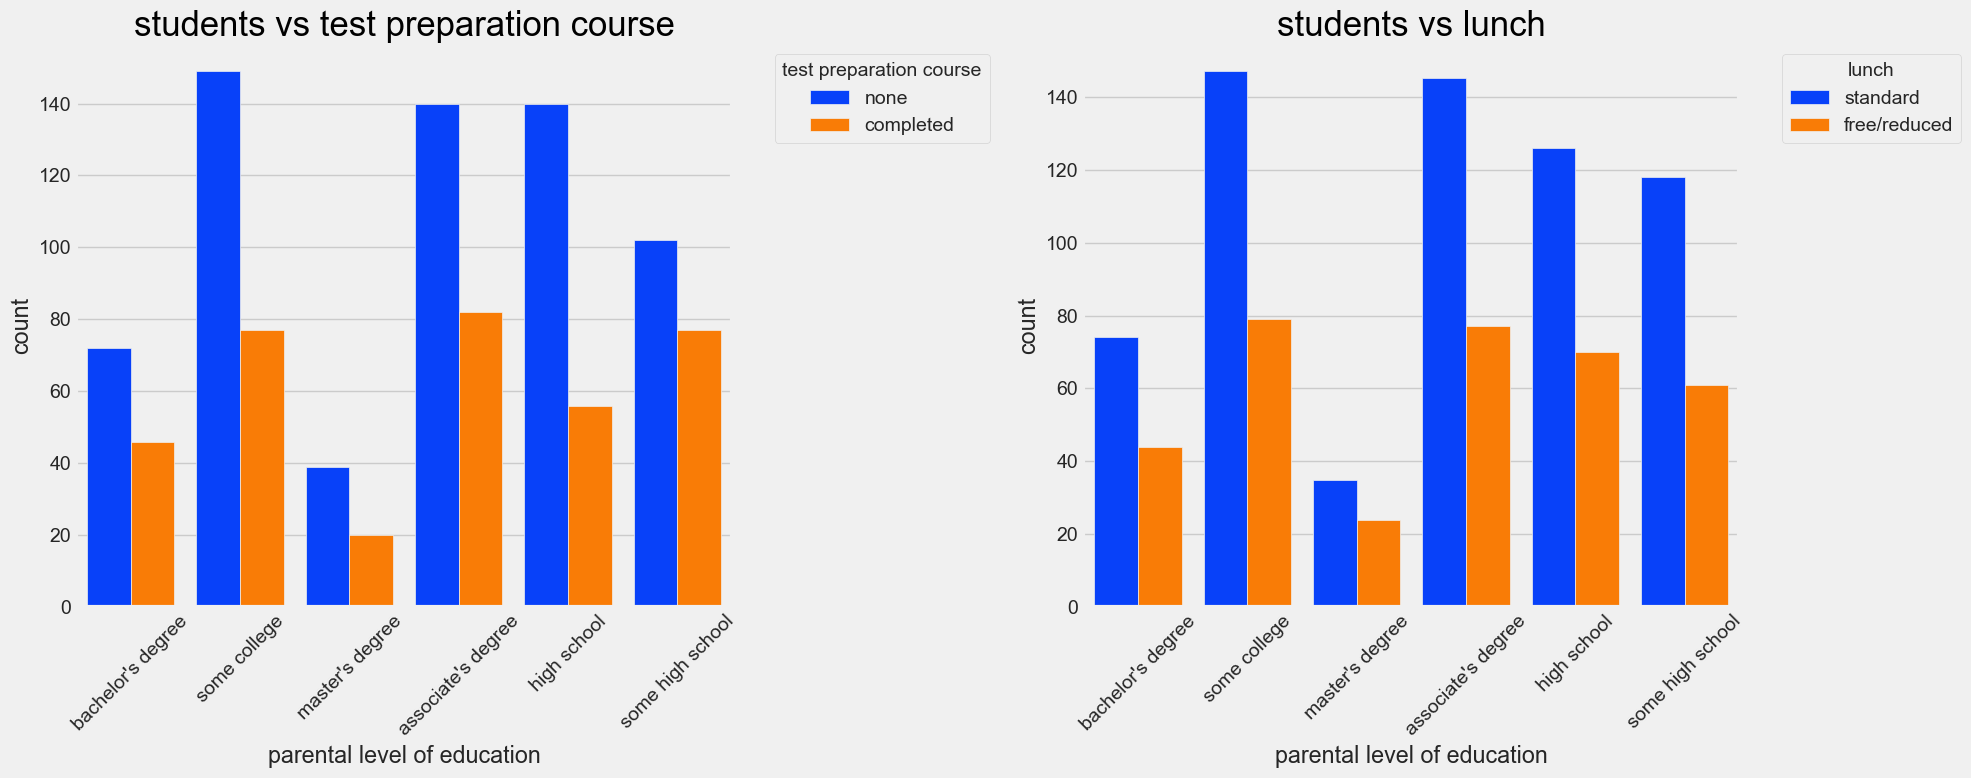

In [43]:
def plot_count_comparison(df, x_column, hue_columns, titles, figsize = (20, 8), rotation = 45):
    """
    
    :param df: 
    :param x_column: 
    :param hue_columns: 
    :param titles: 
    :param palettes: 
    :param figsize: 
    :param rotation: 
    :return: 
    """
    
    fig, axes = plt.subplots(1, len(hue_columns), figsize=figsize)
    
    for idx, (hue_col, title, ) in enumerate(zip(hue_columns, titles, )):
        sns.countplot(
            x = x_column,
            data =df,
            palette = "bright",
            hue = hue_col,
            saturation = 0.95,
            ax=axes[idx]
                       
        )
        
        axes[idx].set_title(title, color = "black", size = 25)
        axes[idx].tick_params(axis="x", rotation = rotation)
        
        # bar labels
        for container in axes[idx].containers:
            axes[idx].legend(title=hue_col, bbox_to_anchor = (1.05,1), loc = 'upper left')
    
    plt.tight_layout()
    plt.show()
    
plot_count_comparison(
    df= df,
    x_column = 'parental level of education',
    hue_columns = ["test preparation course", "lunch"],
    titles = ['students vs test preparation course', "students vs lunch"],
    )
        

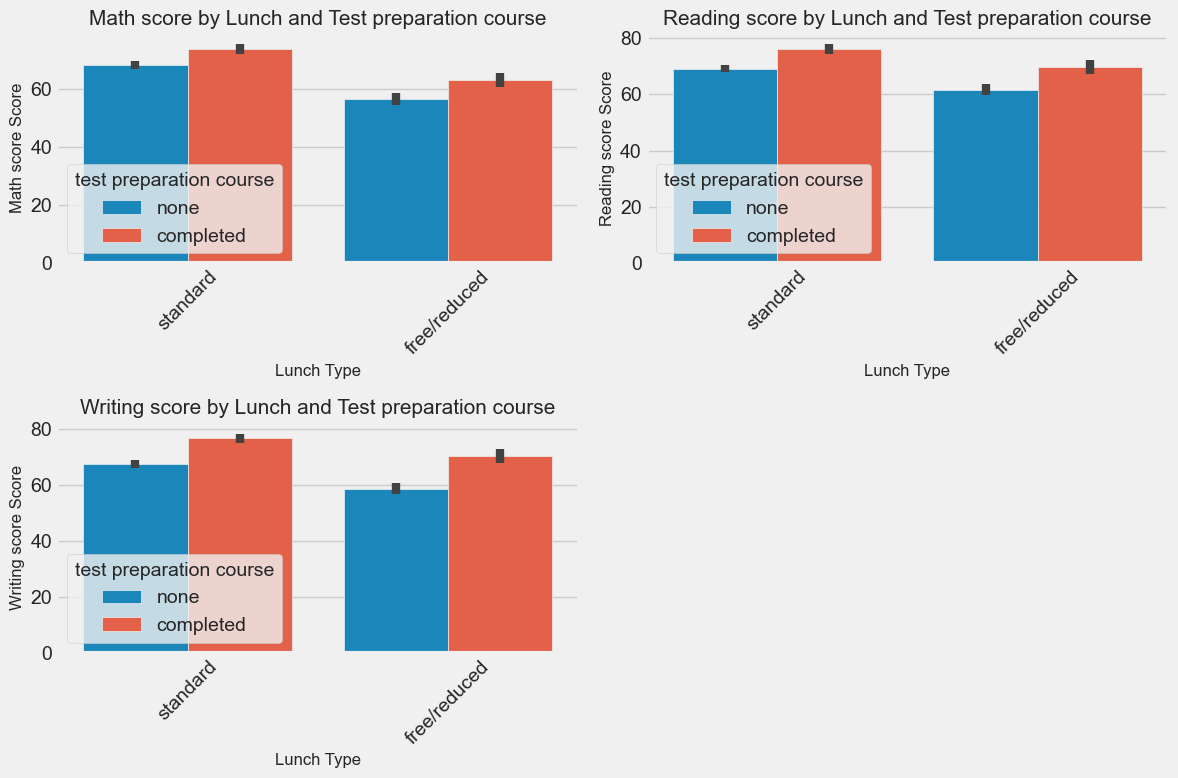

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scores_by_lunch_and_preparation(df, scores_columns, hue_column, figsize=(12, 8)):
    """
    Genera gráficos de barras para comparar puntajes según el tipo de almuerzo y preparación para el examen.
    
    Args:
    - df: DataFrame que contiene los datos.
    - scores_columns: Lista de columnas de puntajes a graficar.
    - hue_column: Columna que se utilizará para el parámetro `hue`.
    - figsize: Tamaño de la figura (por defecto: (12, 8)).
    """
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente
    
    for idx, score_col in enumerate(scores_columns):
        if idx < len(axes):
            sns.barplot(
                x=df['lunch'], 
                y=df[score_col], 
                hue=df[hue_column], 
                ax=axes[idx]
            )
            axes[idx].set_title(f'{score_col.capitalize()} by Lunch and {hue_column.capitalize()}', size=15)
            axes[idx].set_xlabel('Lunch Type', size=12)
            axes[idx].set_ylabel(f'{score_col.capitalize()} Score', size=12)
            axes[idx].tick_params(axis='x', rotation=45)  # Rotar etiquetas x si es necesario
            axes[idx].legend(title=hue_column, loc='best')

    # Ocultar cualquier subplot adicional si no se usa
    for ax in axes[len(scores_columns):]:
        ax.set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Uso de la función
plot_scores_by_lunch_and_preparation(
    df=df,
    scores_columns=['math score', 'reading score', 'writing score'],
    hue_column='test preparation course'
)


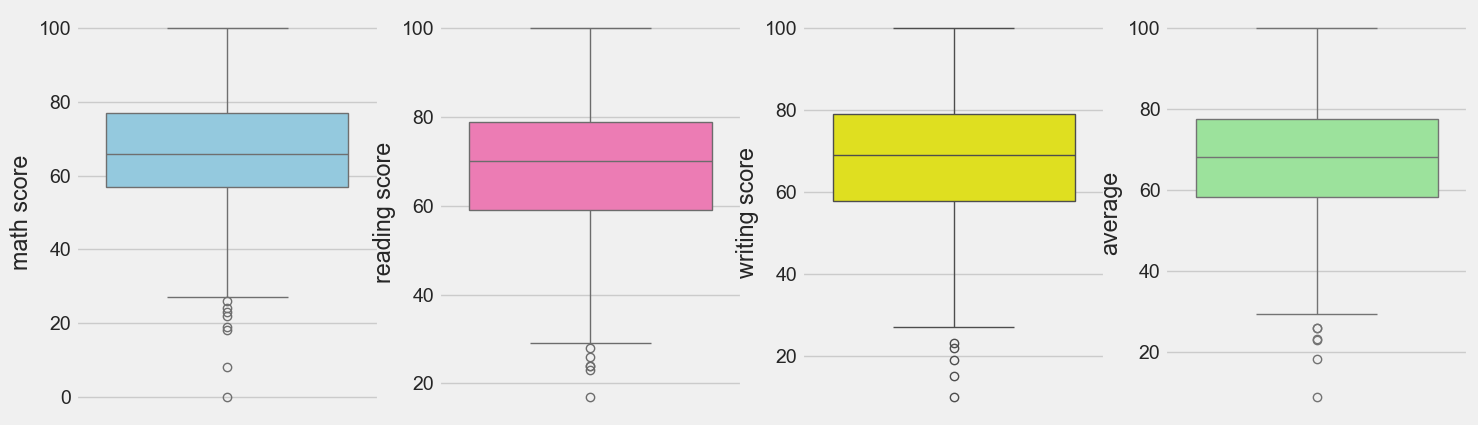

In [32]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

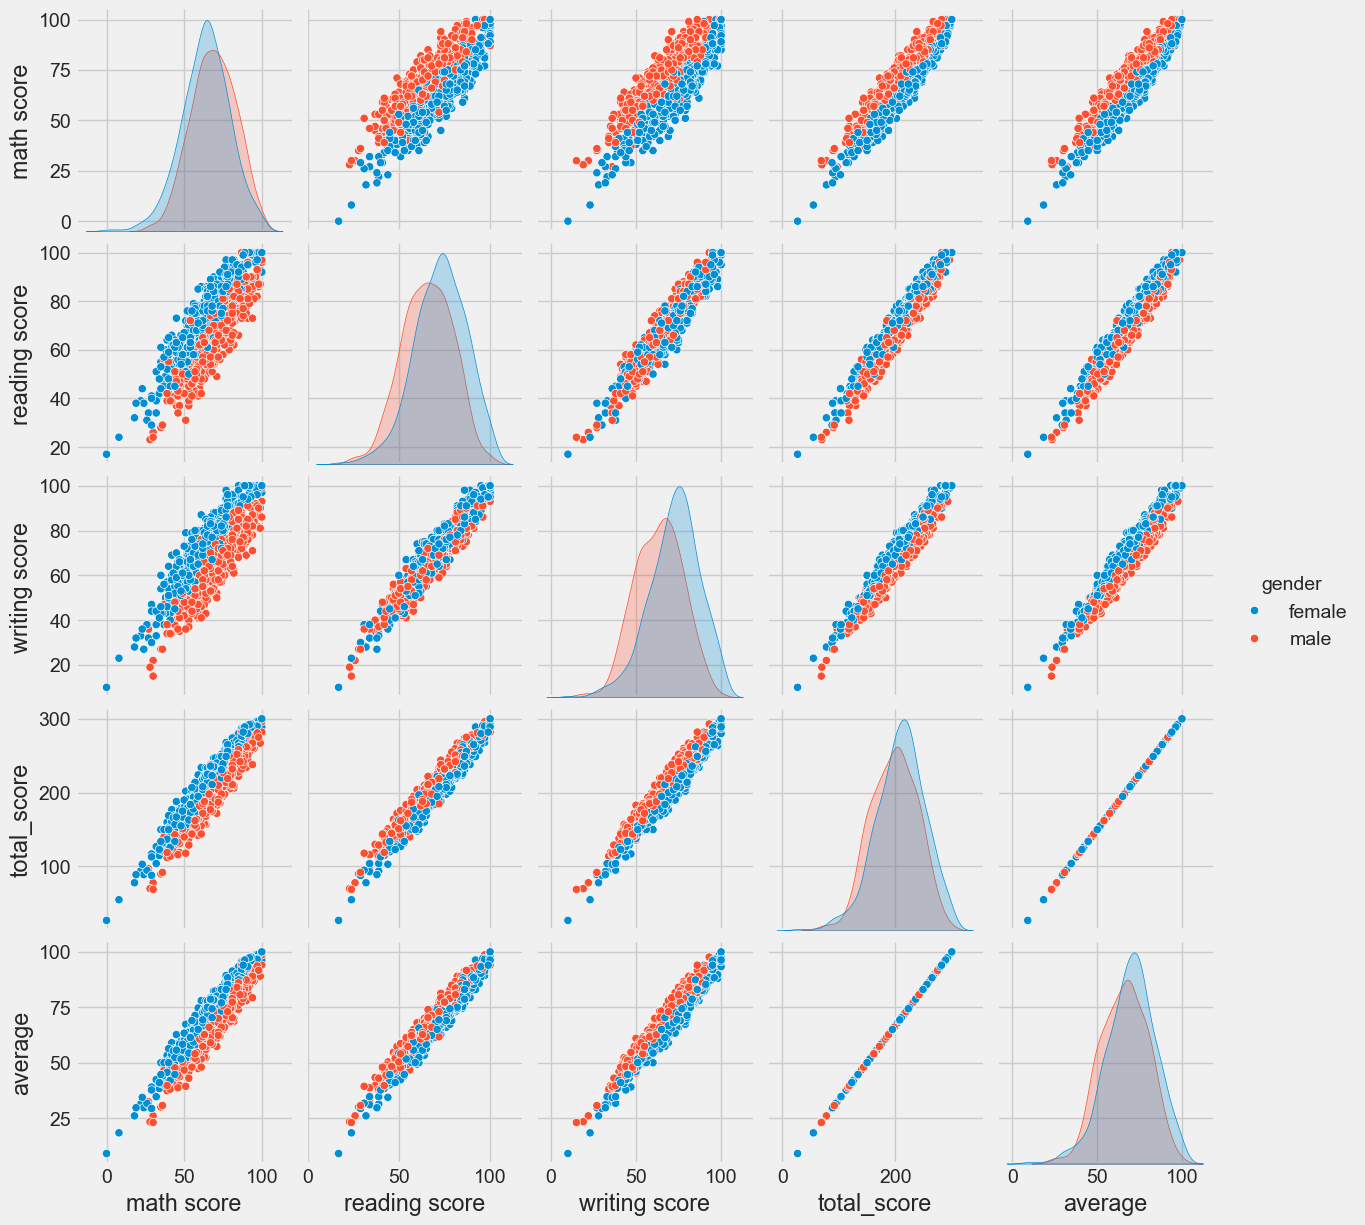

In [33]:
sns.pairplot(df,hue = 'gender')
plt.show()